## MNIST Handwritten Digit Classification using Deep Learning 

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2  
from PIL import Image   
import tensorflow as tf 
tf.random.set_seed(3) 
from tensorflow import keras 
from keras.datasets import mnist  
from tensorflow.math import confusion_matrix 


In [ ]:
## Loading the dataset 


In [17]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [19]:
type(X_train)

numpy.ndarray

In [20]:
X_train.shape

(60000, 28, 28)

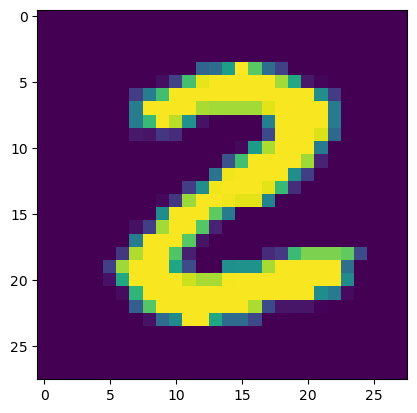

2


In [21]:
# display the image  
plt.imshow(X_train[25]) 
plt.show()

# print the corresponding label 
print(Y_train[25])

In [30]:
# unique values in Y_train
print(np.unique(Y_train))
print(np.unique(X_train))

[0 1 2 3 4 5 6 7 8 9]
[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.341176

In [31]:
X_train = X_train/255
X_test = X_test/255

## Building the Nueral Network Model 

In [32]:
# setting up the layers of the neural Network 
model =keras.Sequential([
                keras.layers.Flatten(input_shape=(28,28)),
                keras.layers.Dense(50,activation='relu'),
                keras.layers.Dense(50,activation='relu'),
                keras.layers.Dense(10,activation='sigmoid')
])

/home/miskatul-masabi/anaconda3/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
# compiling the model 
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10


2025-12-02 11:57:02.594139: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6988 - loss: 0.9833
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8597 - loss: 0.4817
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8880 - loss: 0.3903
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8993 - loss: 0.3462
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9083 - loss: 0.3162
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9151 - loss: 0.2929
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9202 - loss: 0.2733
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9245 - loss: 0.2565
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9284 - loss: 0.2421
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9317 - loss: 0.2297


## Accuracy on Test Data :

In [35]:
loss,accuracy =model.evaluate(X_test,Y_test) 


print(loss,accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9316 - loss: 0.2315   
0.23146125674247742 0.9315999746322632


In [36]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [39]:
Y_test[10] ,y_pred[10]

(np.uint8(0),
 array([9.9853033e-01, 2.6782152e-05, 5.6432587e-01, 1.6755505e-01,
        2.4439776e-04, 9.1741008e-01, 2.1545282e-01, 1.4912465e-03,
        4.6150285e-01, 1.0402891e-02], dtype=float32))

In [40]:
## converting the prediction probability to class label 
label_for_first_image =np.argmax(y_pred[0]) 
label_for_first_image

np.int64(7)

In [45]:
# converting the prediction probabilities to class label for all test data points 
y_pred_labels  =[np.argmax(i) for i in y_pred] 

print(y_pred_labels)

In [51]:
conf=confusion_matrix(Y_test,y_pred_labels)

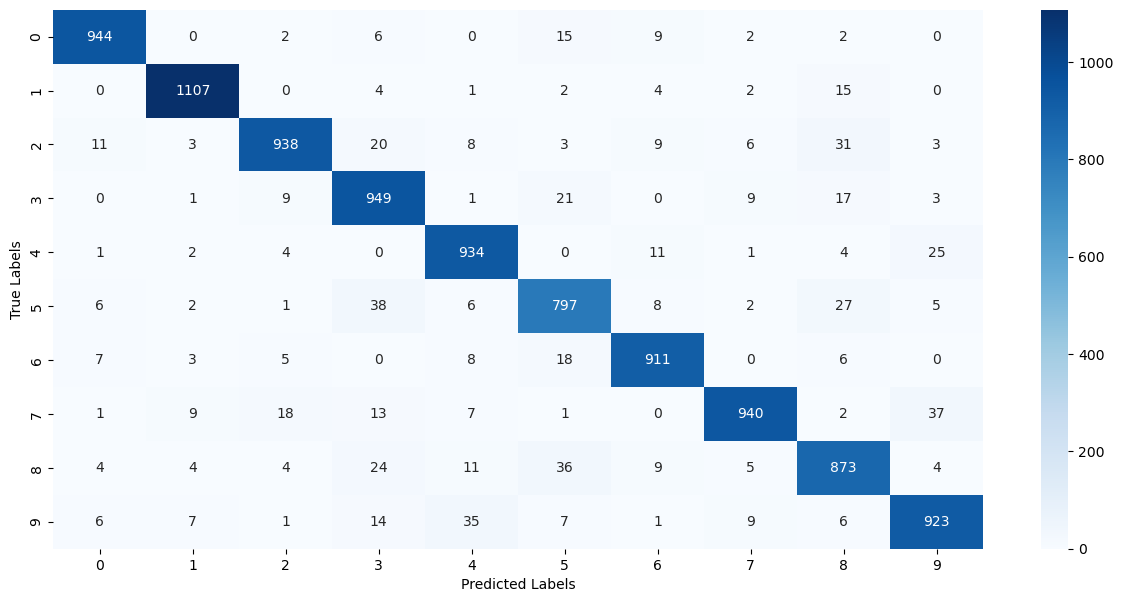

In [52]:
plt.figure(figsize=(15,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()